<a href="https://colab.research.google.com/github/AdeoyeAdekeye/Customer-Churn-Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📦 Project 2: Customer Churn Prediction

## 🎯 Objective
Predict whether a customer is likely to **churn** (i.e., leave a company) based on customer usage and demographics. This is a **binary classification** problem.

---

## 🧠 Problem Statement

You work for a telecom company. Management wants to understand **why customers are leaving** and **predict which ones are at risk**, so they can take preventive actions (like offering incentives).

---

## 📁 Dataset

We’re using the **Telco Customer Churn dataset** from Kaggle.

📎 Download: https://www.kaggle.com/datasets/blastchar/telco-customer-churn


In [11]:
# Import standard libraries
import pandas as pd
import numpy as np

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv")
df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## ✅ Step 1: Inspect the Data

We start by checking the shape, types, and basic stats of the dataset.


In [12]:
# Dataset shape
print("Shape:", df.shape)

# First few rows
display(df.head())

# Data types and null values
df.info()

# Summary stats for numeric columns
df.describe()


Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
# Check for missing values
df.isnull().sum()

# Check unique values for object columns
for col in df.select_dtypes(include='object'):
    print(f"{col}: {df[col].unique()}\n")


customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender: ['Female' 'Male']

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']

Churn: ['No' 'Yes']



## ✅ Step 2: Target Variable — Churn

Let’s look at the class balance of the `Churn` variable (Yes = churned).


Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


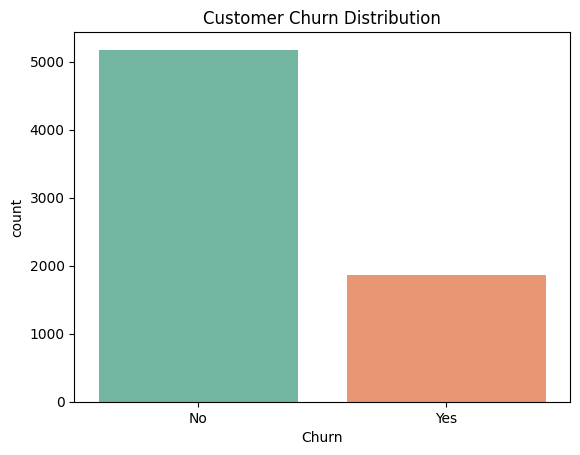

In [14]:
# Count and proportion of churn
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True))

# Bar plot
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title("Customer Churn Distribution")
plt.show()


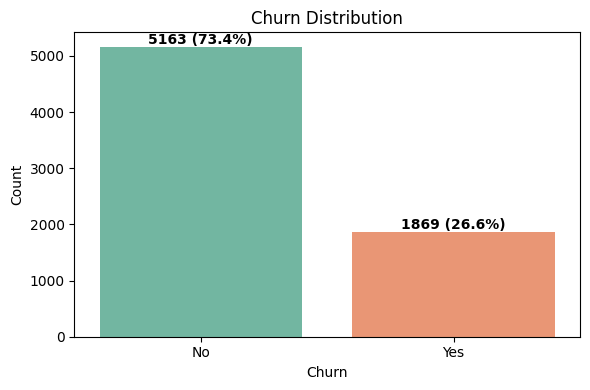

In [28]:
# Churn distribution with percentage labels inside bars
churn_counts = df['Churn'].value_counts()
churn_percent = df['Churn'].value_counts(normalize=True)

# Combine into a DataFrame
churn_df = pd.DataFrame({'Count': churn_counts, 'Percent': churn_percent})
churn_df['PercentLabel'] = (churn_df['Percent'] * 100).round(1).astype(str) + '%'

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=churn_df.index, y=churn_df['Count'], palette='Set2')

# Add text labels
for i, val in enumerate(churn_df['Count']):
    plt.text(i, val + 50, f"{val} ({churn_df['PercentLabel'].iloc[i]})", ha='center', fontweight='bold')

plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


## 📊 Step 3: Exploratory Data Analysis (EDA)

We’ll explore relationships between churn and categorical variables like:

- Contract type
- Payment method
- Internet service type


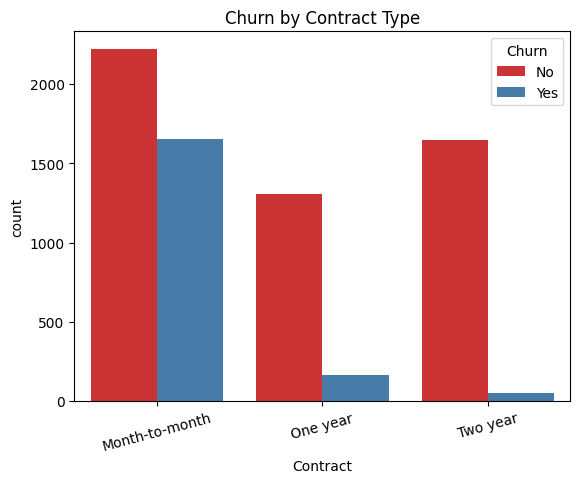

In [15]:
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set1')
plt.title('Churn by Contract Type')
plt.xticks(rotation=15)
plt.show()


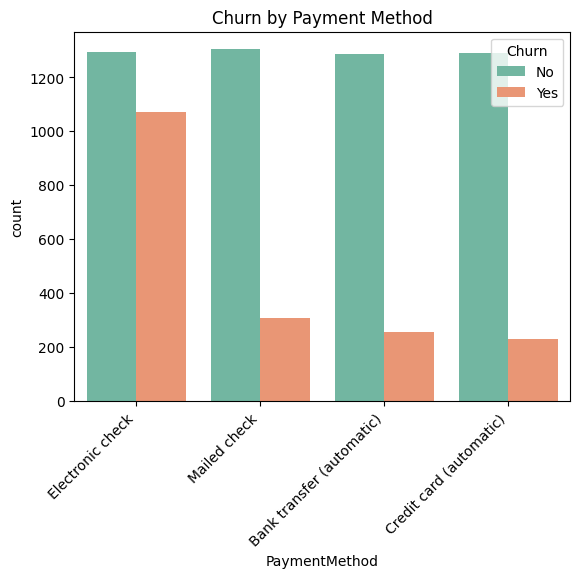

In [16]:
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='Set2')
plt.title('Churn by Payment Method')
plt.xticks(rotation=45, ha='right')
plt.show()


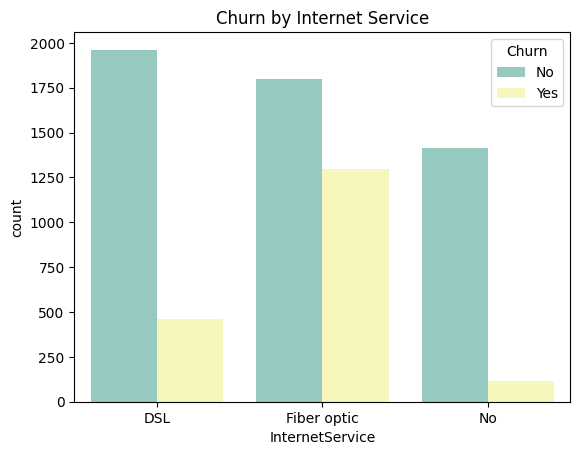

In [17]:
sns.countplot(data=df, x='InternetService', hue='Churn', palette='Set3')
plt.title('Churn by Internet Service')
plt.show()


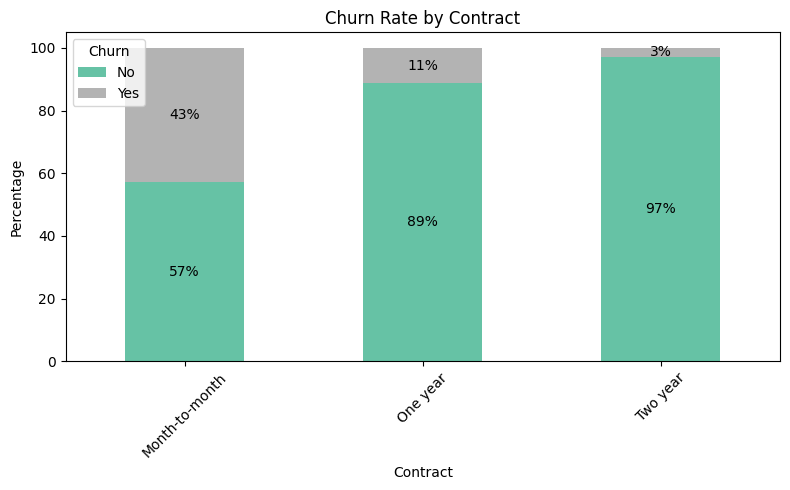

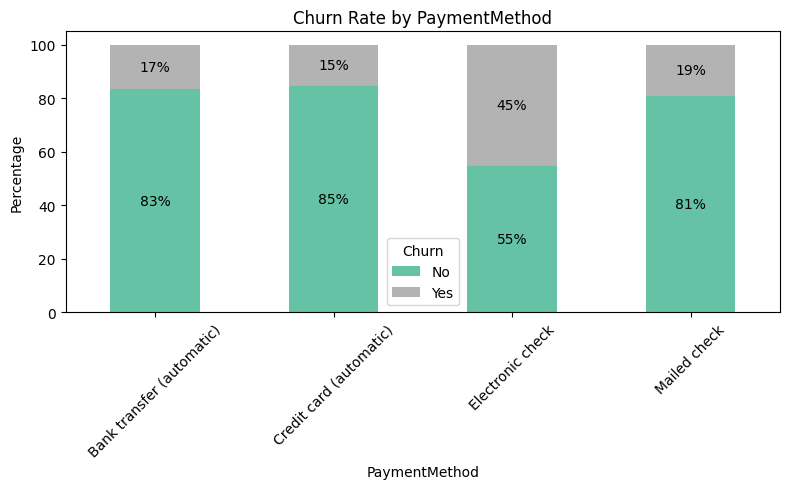

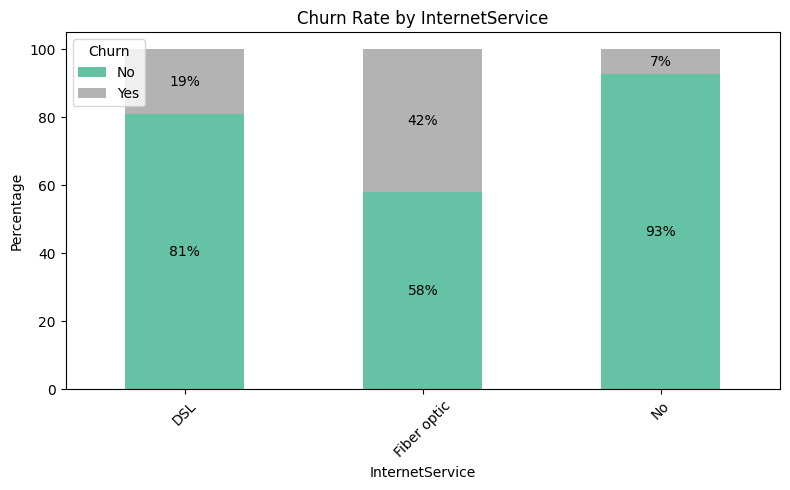

In [29]:
def plot_churn_by_feature(feature):
    # Create crosstab for counts and percents
    ct = pd.crosstab(df[feature], df['Churn'], normalize='index') * 100
    counts = pd.crosstab(df[feature], df['Churn'])

    ct = ct.round(1)

    # Plot stacked bar chart
    ax = ct.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set2')

    # Add labels on each segment
    for c in ax.containers:
        labels = [f'{v.get_height():.0f}%' if v.get_height() > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='center', fontsize=10, color='black')

    plt.title(f"Churn Rate by {feature}")
    plt.ylabel("Percentage")
    plt.xlabel(feature)
    plt.legend(title="Churn")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage:
plot_churn_by_feature('Contract')
plot_churn_by_feature('PaymentMethod')
plot_churn_by_feature('InternetService')


## 🔢 Step 4: Numeric Features — Histograms by Churn
Let’s examine the distribution of numeric features like `tenure`, `MonthlyCharges`, and `TotalCharges` grouped by Churn.


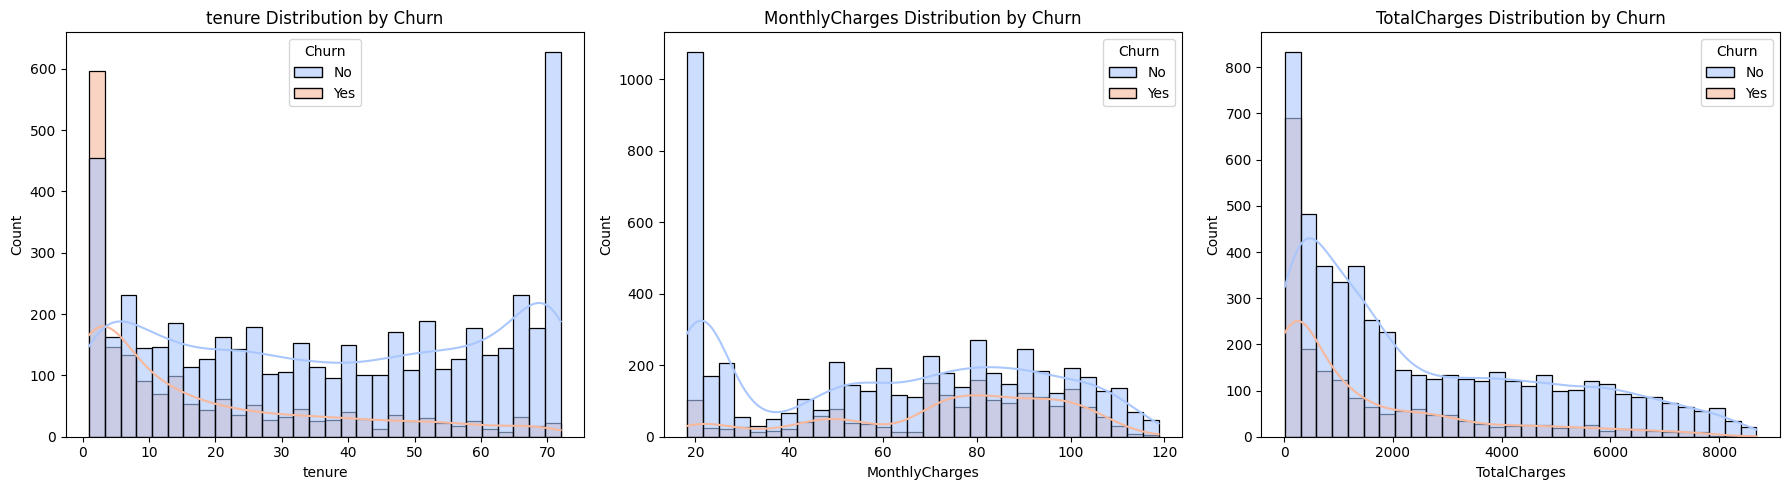

In [18]:
# Convert TotalCharges to numeric, coerce errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing TotalCharges
df = df.dropna(subset=['TotalCharges'])

# Define numerical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Plot
plt.figure(figsize=(18, 5))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data=df, x=col, hue='Churn', kde=True, bins=30, palette='coolwarm', alpha=0.6)
    plt.title(f'{col} Distribution by Churn')
plt.tight_layout()
plt.show()


## 🧮 Step 5: Correlation Matrix

Let’s check how numeric features correlate with each other.


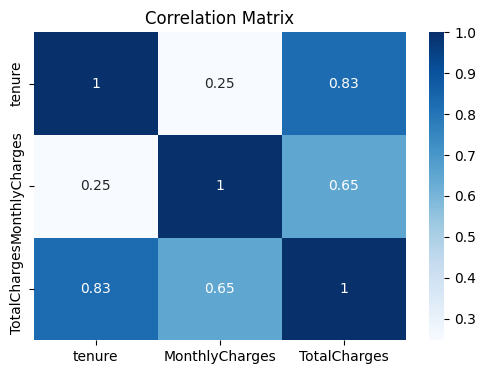

In [19]:
# Correlation matrix
corr = df[num_cols].corr()

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()


# ⚙️ Part 2: Preprocessing & Modeling

We’ll now prepare the data, build machine learning models, evaluate them, and interpret the results.


In [20]:
# Drop customerID (not useful for prediction)
df.drop('customerID', axis=1, inplace=True)


## Code Cell: Encode Categorical Variables

In [21]:
# Identify categorical features
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", cat_cols)

# One-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


## Code Cell: Train-Test Split

In [22]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (5625, 30)
Test shape: (1407, 30)


## Model Training

### Logistic Regression (Baseline)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Train model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict
y_pred_lr = logreg.predict(X_test)


### Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)


## Evaluation Metrics

### Confusion Matrix + Scores

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_test, y_pred, model_name):
    print(f"\n📊 {model_name} Evaluation")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")



📊 Logistic Regression Evaluation
Accuracy: 0.8031272210376688
Precision: 0.6465256797583081
Recall: 0.5721925133689839
F1 Score: 0.6070921985815603

Confusion Matrix:
[[916 117]
 [160 214]]

Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1033
        True       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407


📊 Random Forest Evaluation
Accuracy: 0.7896233120113717
Precision: 0.6258064516129033
Recall: 0.5187165775401069
F1 Score: 0.5672514619883041

Confusion Matrix:
[[917 116]
 [180 194]]

Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.89      0.86      1033
        True       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.

### ROC Curve & AUC Score

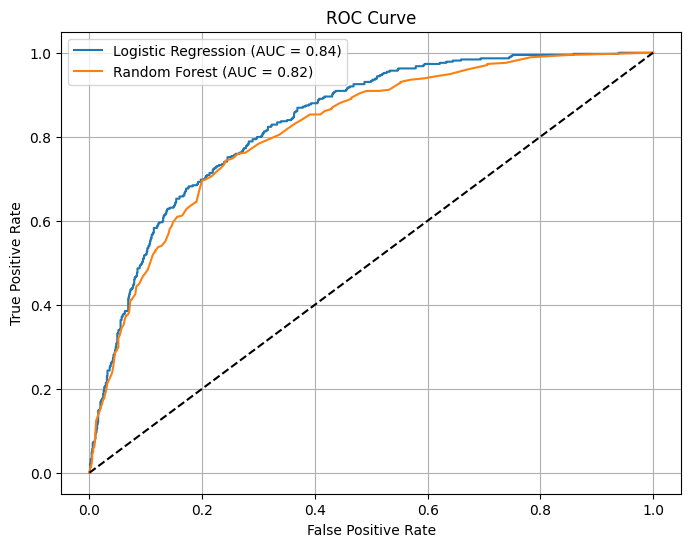

In [26]:
# Predict probabilities
y_prob_lr = logreg.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# AUC Scores
auc_lr = roc_auc_score(y_test, y_prob_lr)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plot ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


### Feature Importances (Random Forest)

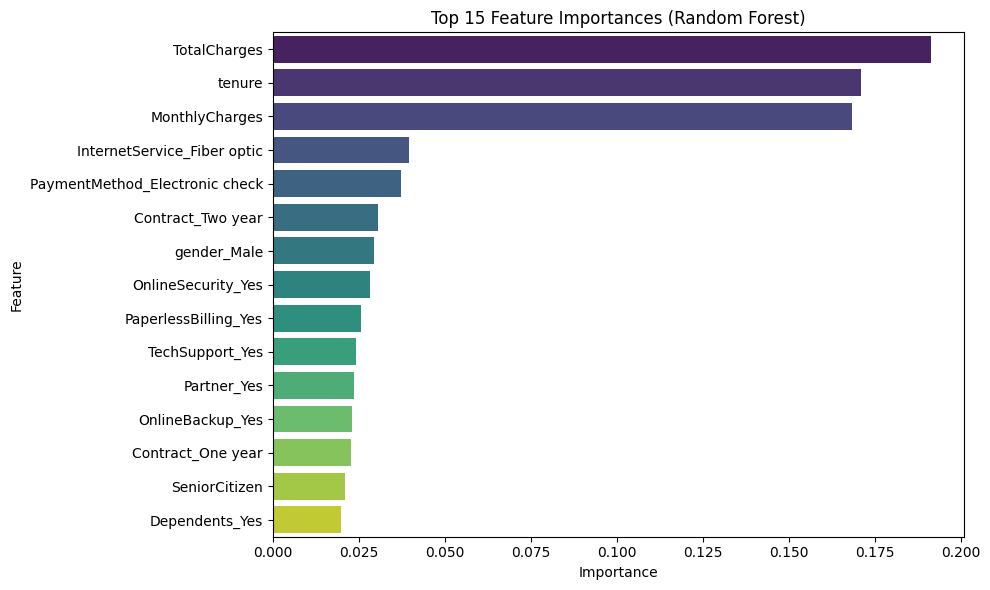

In [27]:
# Feature importances
importances = rf.feature_importances_
feat_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot top 15
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


## 🧾 Insights:

- Longer-tenure customers are less likely to churn.
- Monthly and Total Charges are predictive.
- Customers with month-to-month contracts and fiber internet are more likely to churn.
